In [2]:
using Plots, BenchmarkTools, LinearAlgebra, SparseArrays, LaTeXStrings, NAJ


In [4]:
# q = BasisPolynomial([1f8,2,3,4], SimpleBasis )
p1 = LegendrePolynomial([0, 1.0, 1.0, 2.0, -1, 2])


Legendre Polynomial{Float64}(1.0 L_1(x) + 1.0 L_2(x) + 2.0 L_3(x) - 1.0 L_4(x) + 2.0 L_5(x))


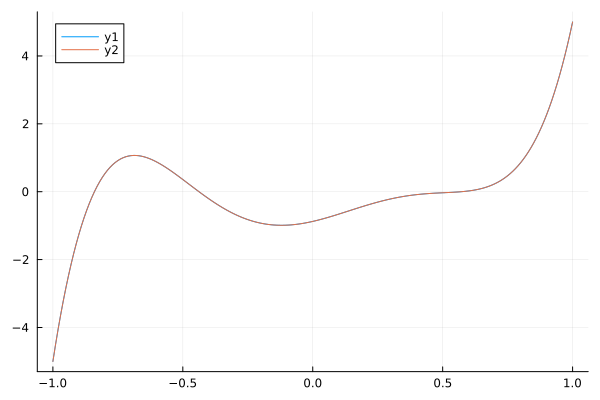

In [5]:
x=-1:0.01:1
plot(x, p1.(x))
plot!(x, SimplePolynomial(p1).(x))

In [18]:
function Base.show(io::IO, p::AbstractBasisPolynomial{T, X}) where {T, X}
    result = ""
    n = length(p)
    if n == 1 && iszero(p.coeffs[1])
        result = "0"
    else 
        for (i, v) in enumerate(p.coeffs[1:end])
            vp = string(abs(v))
            if v > zero(T) && i>1
                result *= " + " * vp * " " *base_string(base_type(p)(i-1))
            elseif v< zero(T) && i > 1
                result *= " - " * vp * " " *base_string(base_type(p)(i-1))
            elseif v > zero(T)
                result *= vp * " " *base_string(base_type(p)(i-1))
            elseif v<zero(T)
                result *= " -"*vp * " " *base_string(base_type(p)(i-1))
            end

            if i == n
                if !iszero(v)
                    result = result[1:end-4]
                else 
                    result = result
                end
            end
        end
    end
    println(io, polynomial_string(p) * "{$(eltype(p.coeffs))}($(result[1:end]))")
end

In [19]:
p1

MethodError: MethodError: no method matching polynomial_string(::LegendrePolynomial{Float64})

Closest candidates are:
  polynomial_string(!Matched::SimplePolynomial)
   @ Main ~/Documents/Projects/NumericalAnalysisJulia/src/numerical_analysis_using_julia/ch13_approximations/chevyshev.ipynb:5


In [ ]:




# struct SimplePolynomial{T}<:AbstractBasisPolynomial
#     coeffs::Vector{T}
#     baseType::Type
    
#     function SimplePolynomial(a::AbstractVector{P}) where P <: Number
#         if length(a) == 0 
#             return new{P}(zeros(T, 1), SimpleBasis{Float64})
#         else 
#             last_nz = findlast(!iszero, a)
#             a_last = max(1, isnothing(last_nz) ? 0 : last_nz)
#             return new{P}(a[1:a_last], SimpleBasis{Float64})
#         end
#     end

#     function SimplePolynomial{T}(a::AbstractVector{P}) where {T <: Number, P<:Number}
#         if length(a) == 0 
#             return new{T}(zeros(T, 1), SimpleBasis{Float64})
#         else 
#             last_nz = findlast(!iszero, a)
#             a_last = max(1, isnothing(last_nz) ? 0 : last_nz)
#             return new{T}(convert.(T, a[1:a_last]), SimpleBasis{Float64})
#         end
#     end

# end

# """
#     legendre_polynomial_coefficients(T::Type=Float64, n::Integer = 0)
# """
# function legendre_polynomial_coefficients(T::Type=Float64, n::Integer = 0)
#     @assert n ≥ 0
    
#     coeffs = [[1//1, ], [0//1, 1//1]]
#     m = n+1
    
#     if m < 2 
#         return coeffs[m]
#     else 
#         for k in 3:m
#             a1 = vcat([0], coeffs[k-1]) .* ((2k-3)//(k-1))
#             a2 = vcat(coeffs[k-2], [0, 0], ) .*((k-2)//(k-1))
#             push!(coeffs, a1.-a2 )
#         end
#         return convert.(T, coeffs[end])
#     end
# end

# struct LegendreBasis{T}<:PolynomialBasis
#     order::Integer
#     coeffs::Vector{T} 

#     function LegendreBasis(order::Integer = 0) 
#         @assert order ≥ 0
#         return new{Float64}(order, legendre_polynomial_coefficients(Float64, order))
#     end

#     function LegendreBasis{T}(order::Integer = 0) where T<:Real
#         @assert order ≥ 0
#         return new{T}(order, legendre_polynomial_coefficients(T, order))
#     end
# end


In [ ]:
q = BasisPolynomial([1f8,2,3,4], SimpleBasis )

In [ ]:


"""
    SimplePolynomial{T}

간단한 polynomial 자료형.
"""
struct SimplePolynomial{T} <: AbstractBasisPolynomial
    coeffs :: Vector{T}
    
    function SimplePolynomial(a::AbstractVector{P}) where P <: Number
        if length(a) == 0 
            return new{P}(zeros(T, 1))
        else 
            last_nz = findlast(!iszero, a)
            a_last = max(1, isnothing(last_nz) ? 0 : last_nz)
            return new{P}(a[1:a_last])
        end
    end

    function SimplePolynomial{T}(a::AbstractVector{P}) where {T <: Number, P<:Number}
        if length(a) == 0 
            return new{T}(zeros(T, 1))
        else 
            last_nz = findlast(!iszero, a)
            a_last = max(1, isnothing(last_nz) ? 0 : last_nz)
            return new{T}(convert.(T, a[1:a_last]))
        end
    end

end

function (p::SimplePolynomial)(x::T) where T <: Number
    return evalpoly(x, p.coeffs)
end


function (p::SimplePolynomial)(x::T) where T <: Matrix{N} where N<:Number
    r = UniformScaling(p.coeffs[1])
    @assert size(x)[1] == size(x)[2] # 정사각 행렬에 대해서만 가능하다.
    for i in 2:length(p.coeffs)
        @inbounds r +=  p.coeffs[i]*x^(i-1)
    end
    return r
end

function Base.show(io::IO, p::SimplePolynomial{T}) where T<:Number
    result = ""
    n = length(p)
    if n == 1 && iszero(p.coeffs[1])
        result = "0"
    else 
        for (i, v) in enumerate(p.coeffs[end:-1:1])
            vp = string(abs(v))
            if v > zero(T) && i>1
                result *= " + " * vp * " x^$(n-i)"
            elseif v< zero(T) && i > 1
                result *= " - " * vp * " x^$(n-i)"
            elseif v > zero(T)
                result *= vp * " x^$(n-i)"
            elseif v<zero(T)
                result *= " -"*vp * " x^$(n-i)"
            end

            if i == n
                if !iszero(v)
                    result = result[1:end-4]
                else 
                    result = result
                end
            end
        end
    end
    println(io, "SimplePolynomial{$(eltype(p.coeffs))}($(result[1:end]))")
end


# Base.length(p::SimplePolynomial) = length(p.coeffs)

# order(p::SimplePolynomial) = length(p)-1
# degree(p::SimplePolynomial) = order(p)


function Base.zero(a::P) where P<:SimplePolynomial
    return SimplePolynomial([zero(eltype(a.coeffs)), ])
end

function Base.one(a::P) where P<:SimplePolynomial
    return SimplePolynomial([one(eltype(a.coeffs)), ])
end

function Base.:-(b::P) where {P<: SimplePolynomial}
    coeffs = -b.coeffs
    return SimplePolynomial(coeffs)
end

function Base.:+(a::T, b::SimplePolynomial{P}) where {T <: Number, P <: Number} 
    rT = promote_type(T, P)
    coeffs = rT.(b.coeffs)
    coeffs[1] += a
    return SimplePolynomial(coeffs)
end

function Base.:+(b::SimplePolynomial{P}, a::T) where {P <: Number, T <: Number} 
    return a+b
end

function Base.:+(a::SimplePolynomial{P1}, b::SimplePolynomial{P2}) where {P1 <: Number, P2 <: Number} 
    rT = promote_type(P1, P2)
    if length(b) > length(a)
        coeffs = zeros(rT, length(b))
        coeffs[1:length(a)] = a.coeffs[:]
        coeffs += b.coeffs
    else 
        coeffs = zeros(rT, length(a))
        coeffs[1:length(b)] = b.coeffs[:]
        coeffs += a.coeffs
    end
    return SimplePolynomial(coeffs)
end

function Base.:-(a::SimplePolynomial{P1}, b::SimplePolynomial{P2}) where {P1 <: Number, P2 <: Number} 
    return a + (-b)
end

function Base.:-(b::SimplePolynomial{P}, a::T) where {P <: Number, T <: Number} 
    return b+(-a)
end

function Base.:-(a::T, b::SimplePolynomial{P}) where {T <: Number, P <: Number} 
    return a+(-b)
end

function Base.:*(a::T, b::SimplePolynomial{P}) where {T <: Number, P <: Number} 
    return SimplePolynomial(b.coeffs*a)
end

function Base.:*(b::SimplePolynomial{P}, a::T) where {P <: Number, T <: Number} 
    return SimplePolynomial(b.coeffs*a)
end

function Base.:*(a::SimplePolynomial{P1}, b::SimplePolynomial{P2}) where {P1 <: Number, P2 <:Number} 
    rT = promote_type(P1, P2)
    ord1, ord2 = degree(a), degree(b)
    ord = ord1*ord2
    coef = zeros(rT, ord+2)
    
    for i in 0:ord1, j in 0:ord2
        @inbounds coef[i+j+1] += a.coeffs[i+1]*b.coeffs[j+1]
    end
    return SimplePolynomial(coef)
end



function Base.:/(b::SimplePolynomial{P}, a::T) where {P <: Number, T <: Number} 
    return SimplePolynomial(b.coeffs/a)
end

"""
    monic(p::P) where {P<:SimplePolynomial}

return monic polynomial of which highest coefficient is 1
"""
function monic(p::P) where P<:SimplePolynomial
    return p/p.coeffs[end]
end

"""
    derivative(p::SimplePolynomial)

return derivatives of polynomial p
"""
function derivative(p::SimplePolynomial)
    if length(p) < 2 
        return SimplePolynomial([one(eltype(p.coeffs)), ])
    else
        coeffs = p.coeffs[2:end] .* (1:(length(p)-1))
        return SimplePolynomial(coeffs)
    end
end


"""
    integrate(p::P, a, b)

Integrate polynomial p. If both a and b are numbers, return definite integration from a to b. If a and b
are nothing, returns indefinite integral with constant 0. If only one of a and b are nothing, returns
indefinite integral with constant of non-nothing number.
"""
function integrate(p::SimplePolynomial, a::Union{Nothing, Number}=nothing, b::Union{Nothing, Number}=nothing) 

    if eltype(p.coeffs) <: Integer
        coeffs = zeros(Float64, length(p)+1)
    else 
        coeffs = zeros(eltype(p.coeffs), length(p)+1)
    end
    
    for i in 1:length(p.coeffs)
        coeffs[i+1] = p.coeffs[i]/(i)
    end
    
    
    if a === nothing && b === nothing # 상수항이 0 인 부정적분
        coeffs[1] = zero(eltype(coeffs))
        return SimplePolynomial(coeffs)
    elseif a === nothing || b === nothing # 상수항이 a 혹은 b 로 주어진 부정적분
        coeffs[1] = a
        return SimplePolynomial(coeffs)
    else # a 에서 b 구간 까지의 정적분
        return evalpoly(b, coeffs) - evalpoly(a, coeffs)
    end
end


"""
    polynomial_from_roots(xp::Vector{T}) where T<:Number

return monic polynomial having roots xp[1],..., xp[end].
"""
function polynomial_from_roots(xp::AbstractVector{T}) where T<:Number 
    return prod([SimplePolynomial([-x0, 1]) for x0 in xp])
end

"""
    valdermond_polynomial(xp, yp)

return Valdermond Polynomial. 
"""
function valdermond_polynomial(
    xp::AbstractVector{T1}, 
    yp::AbstractVector{T2}) where {T1<:Number, T2<:Number}
    
    N = length(xp)
    @assert length(xp) == length(yp)
    V = [x^(j-1) for x in xp, j in 1:length(xp)]
    return SimplePolynomial(V\yp)
end

"""
    valdermond_polynomial(xp, yp)

return Lagrange Polynomial. 
"""
function lagrange_polynomial(
    xp::AbstractVector{T1}, 
    yp::AbstractVector{T2}) where {T1<:Number, T2<:Number}

    N = length(xp)
    @assert length(xp) == length(yp)
    
    r = SimplePolynomial([zero(T2), ])
    for i in 1:N
        coef = yp[i]
        rt = one(T2)
        for j in 1:N
            if i ≠ j
                @inbounds coef = coef/(xp[i]-xp[j])
                @inbounds rt = rt*SimplePolynomial([-xp[j], 1.0])
            end
        end
        r += rt*coef
    end
    return r
end

"""
    valdermond_polynomial(xp, yp)

return Newton Polynomial.
"""

function newton_polynomial(
    xp::AbstractVector{T1}, 
    yp::AbstractVector{T2}) where {T1<:Number, T2<:Number}
    n = length(xp)    
    @assert n == length(yp)
    T = promote_type(T1, T2)
    N = LowerTriangular(ones(T, n, n))
    for j in 2:n, i in j:n
        @inbounds N[i, j] = N[i, j-1]*(xp[i] - xp[j-1]) 
    end
    a = N\yp
    r = SimplePolynomial([a[1], ])
    for i in 2:(n)
        @inbounds r += a[i] * polynomial_from_roots(xp[1:i-1])
    end
    return r

end


function chevyshev_polynomial_coefficients(T::Type=Float64, n::Integer = 0)
    @assert n ≥ 0
    
    coeffs = [[1//1, ], [0//1, 1//1]]
    m = n+1
    
    if m < 2 
        return convert.(T, coeffs[m])
    else 
        for k in 3:m
            a1 = vcat([0], coeffs[k-1].*2) 
            a2 = vcat(coeffs[k-2], [0, 0], ) 
            push!(coeffs, a1.-a2 )
        end
        return convert.(T, coeffs[end])
    end
end

struct ChevyshevPolynomialBase{T}<:PolynomialBasis
    order::Int64
    coeffs::Vector{T}

    function ChevyshevPolynomialBase(order::Integer = 0) 
        @assert order ≥ 0
        return new{Float64}(order, chevyshev_polynomial_coefficients(Float64, order))
    end

    function ChevyshevPolynomialBase{T}(order::Integer = 0) where T<:Real
        @assert order ≥ 0
        return new{T}(order, chevyshev_polynomial_coefficients(T, order))
    end
end

function (p::ChevyshevPolynomialBase)(x::T) where T <: Number
    return evalpoly(x, p.coeffs)
end

function Base.show(io::IO, p::ChevyshevPolynomialBase{T}) where T<:Real
    println(io, "LegendrePolynomial{$T}($(p.order))")
end

function toSimplePolynomial(p::ChevyshevPolynomialBase)
    return SimplePolynomial(p.coeffs)
end

struct ChevyshevPolynomials{T}
    coeffs::Vector{T}
end

In [ ]:
cv0 = ChevyshevPolynomialBase(0)
cv1 = ChevyshevPolynomialBase(1)
cv2 = ChevyshevPolynomialBase(2)
cv3 = ChevyshevPolynomialBase(3)
cv4 = ChevyshevPolynomialBase(4)

In [ ]:
x=-1:0.01:1
plot(x, cv1.(x), label = L"T_1(x)", lw=1.5, frame = :box, title = "Chevyshev Polynomials")
plot!(x, cv2.(x), label = L"T_2(x)", lw=1.5)
plot!(x, cv3.(x), label = L"T_3(x)", lw=1.5)
plot!(x, cv4.(x), label = L"T_4(x)", lw=1.5)

In [ ]:
heatmap(A, aspect_ratio=:equal)

In [ ]:
a = [1, 2, 3]
T = eltype(a)

In [ ]:
Vector{T}([])